In [2]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Data Importing

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.3
Matplotlib version=3.1.3
Python version=3.7.3


In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
iris.data[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
iris.target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## The different species of Iris flower
!["Iris Species"](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


## The different features of Iris flower
![](https://i0.wp.com/blog.kaggle.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

### Dataset and Iris attributes
![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

# Exploratory Data Analysis

In [9]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["class"]=iris.target
df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Since all values are number, we can check data quality with describe
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


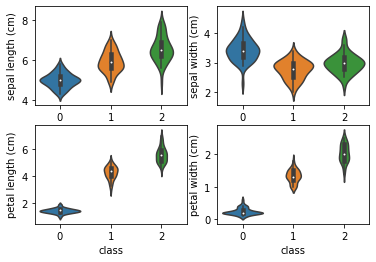

In [11]:
#Plotting the distributions of examples over each class
plt.subplot(221)
sns.violinplot(x = "class", y = "sepal length (cm)", data=df, size =6)
plt.subplot(222)
sns.violinplot(x = "class", y = "sepal width (cm)", data=df, size = 6)
plt.subplot(223)
sns.violinplot(x = "class", y = "petal length (cm)", data=df, size = 6)
plt.subplot(224)
sns.violinplot(x = "class", y = "petal width (cm)", data=df, size = 6)
plt.show()

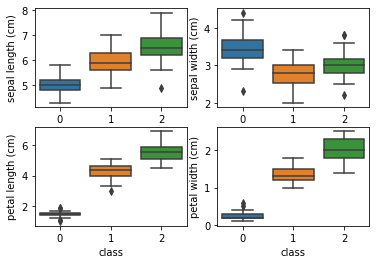

In [12]:
#Plotting the distributions of examples over each class
plt.subplot(221)
sns.boxplot(x = "class", y = "sepal length (cm)", data=df)
plt.subplot(222)
sns.boxplot(x = "class", y = "sepal width (cm)", data=df)
plt.subplot(223)
sns.boxplot(x = "class", y = "petal length (cm)", data=df)
plt.subplot(224)
sns.boxplot(x = "class", y = "petal width (cm)", data=df)
plt.show()

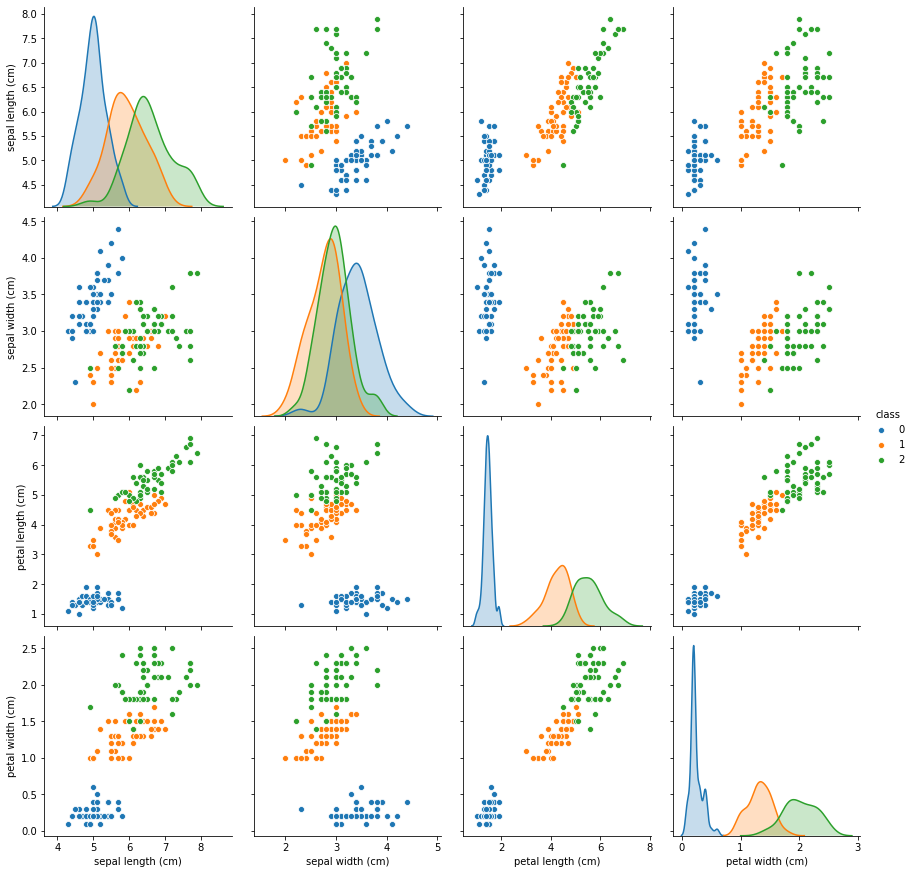

In [15]:
#Plot relationship between pairwise
sns.pairplot(df, hue="class", height=3)
plt.show()


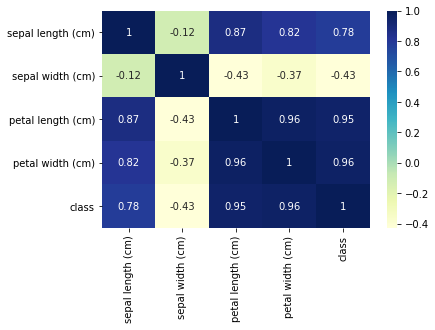

In [14]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Data Preparation

## The data is very clean for the Iris dataset and needs no special preparation

In [16]:
# get data (X) and target (y)
X, y = iris.data, iris.target

#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)

# Train Model

In [17]:
# get the LogisticReggression estimator
from sklearn.linear_model import LogisticRegression

# training the model
# apply algorithm to data using fit()
clf = LogisticRegression(solver="newton-cg", multi_class="multinomial")
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# We can save the trained model clf using pickle (step 4)
import pickle
s = pickle.dumps(clf)
pickle.dump( clf, open( "iris_trained_model_ipynb.p", "wb" ) )
clf2 = pickle.load( open( "iris_trained_model_ipynb.p", "rb" ) )

# Alternatively, we can save the trained model clf with sklearn joblib
from sklearn.externals import joblib
joblib.dump(clf, 'iris_trained_model_ipynb.pkl') 
clf3 = joblib.load('iris_trained_model_ipynb.pkl')


# Score and Evaluate Model

In [19]:
y_hat = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]


# Conclusions